In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_excel("Data_Breach_Chronology_sample.xlsx")

In [6]:
df

,id,source,org_name,acceptable_names,org_name_explanation,reported_date,breach_date,end_breach_date,incident_details,date_info_explanation,...,breach_location_city,breach_location_state,breach_location_zip,breach_location_country,breach_location_explanation,tags,source_url,notification_url_original,created_at,updated_at
0,9e38b3ea-ae63-5d83-aaed-73952834000f,IN,Des Moines Area Community College,NaN,The Indiana Office of the Attorney General rep...,2020-10-30,2019-12-01,UNKN,The Indiana Office of the Attorney General rep...,The Indiana Office of the Attorney General rep...,...,UNKN,UNKN,UNKN,UNKN,The agency reported information does not inclu...,"unencrypted,90-days-or-longer-response,indiana...",https://www.in.gov/attorneygeneral/consumer-pr...,https://www.in.gov/attorneygeneral/consumer-pr...,2025-01-19 08:47:35,2025-01-19 08:47:35
1,3baa552d-66af-5371-b32e-05aa3c540031,MD,"WMS Partners, LLC",WMS,The breach notification letter explicitly iden...,2021-02-25,2020-12-21,2020-12-21,"On February 25, 2021, the Maryland Office of t...",The Maryland Office of the Attorney General re...,...,Towson,MD,21204,United States,The breach notification letter explicitly stat...,"personal-information-compromised,finance,regis...",https://www.marylandattorneygeneral.gov/Pages/...,https://www.marylandattorneygeneral.gov/ID%20T...,2025-01-19 08:44:44,2025-01-19 08:44:44
2,1252da3b-8848-5303-a5eb-bbd6232ee86f,CA,"Wolff-ST, LLC","Marmi, Wolff Shoe",The California Office of the Attorney General ...,2022-03-16,2021-08-29,2022-01-31,The California Office of the Attorney General ...,The California Office of the Attorney General ...,...,Fenton,MO,63026,United States,The breach location was not explicitly stated ...,"extended-breach-duration,business-other,90-day...",https://oag.ca.gov/ecrime/databreach/reports/s...,https://oag.ca.gov/system/files/Notice.pdf,2025-01-19 08:43:32,2025-01-19 08:43:32
3,78d61170-9d43-52f8-b17e-1f3b53f5dced,HHS,Minnesota Department of Human Services,NaN,The breach notification was reported by the U....,2018-10-09,UNKN,UNKN,"On October 9, 2018, the Minnesota Department o...",The U.S. Department of Health and Human Servic...,...,UNKN,MN,UNKN,UNKN,The breach location was not explicitly stated ...,"health,unencrypted-data,hack,healthcare-provid...",https://ocrportal.hhs.gov/ocr/breach/breach_re...,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2025-01-19 08:46:33,2025-01-19 08:46:33
4,e064a568-64bb-5e54-bfb3-5f97de0abcd8,MT,GlaxoSmithKline,"GSK, GlaxoSmithKline Patient Assistance Progra...",The Montana Department of Justice reported the...,2017-10-31,2016-08-01,2017-03-17,The Montana Department of Justice reported on ...,The Montana Department of Justice reported thi...,...,UNKN,UNKN,UNKN,UNKN,The breach notification letter does not explic...,"sensitive-personal-information,identity-theft,...",https://dojmt.gov/office-of-consumer-protectio...,https://dojmt.gov/wp-content/uploads/GlaxoSmit...,2025-01-19 08:49:40,2025-01-19 08:49:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a9d69cc5-098e-51d2-ae33-cc6153069c3f,MT,Baylor Scott & White Medical Center - Frisco,"BSWF, Baylor Scott & White Medical Center",The Montana Department of Justice reported the...,2018-11-28,2018-09-22,2018-09-29,The Montana Department of Justice reported a d...,The Montana Department of Justice reported thi...,...,UNKN,UNKN,UNKN,UNKN,The notification letter does not explicitly st...,NaN,https://dojmt.gov/office-of-consumer-protectio...,https://dojmt.gov/wp-content/uploads/Baylor-Sc...,2025-01-23 06:56:01,2025-01-23 06:56:01
96,73f01602-a1da-5bdd-b0f7-cb41419fb099,CA,Premier America Credit Union,"Premier America, Premier America CU",The California Office of the Attorney General ...,2016-09-22,2016-06-29,UNKN,The California Office of the Attorney General ...,The California Office of the Attorney General ...,...,UNKN,UNKN,UNKN,UNKN,The notification letter does not explicitly st...,"finance,unintended-disclosure-ema

In [7]:
df.dtypes

id                                   object
source                               object
org_name                             object
acceptable_names                     object
org_name_explanation                 object
reported_date                        object
breach_date                          object
end_breach_date                      object
incident_details                     object
date_info_explanation                object
information_affected                 object
information_affected_explanation     object
organization_type                    object
organization_type_explanation        object
breach_type                          object
breach_type_explanation              object
group_uuid                           object
normalized_org_name                  object
normalized_org_name_explanation      object
group_org_breach_type                object
group_org_breach_type_explanation    object
group_org_type                       object
group_org_type_explanation      

In [8]:
df.columns

Index(['id', 'source', 'org_name', 'acceptable_names', 'org_name_explanation',
       'reported_date', 'breach_date', 'end_breach_date', 'incident_details',
       'date_info_explanation', 'information_affected',
       'information_affected_explanation', 'organization_type',
       'organization_type_explanation', 'breach_type',
       'breach_type_explanation', 'group_uuid', 'normalized_org_name',
       'normalized_org_name_explanation', 'group_org_breach_type',
       'group_org_breach_type_explanation', 'group_org_type',
       'group_org_type_explanation', 'total_affected', 'residents_affected',
       'impact_info_explanation', 'breach_location_street',
       'breach_location_city', 'breach_location_state', 'breach_location_zip',
       'breach_location_country', 'breach_location_explanation', 'tags',
       'source_url', 'notification_url_original', 'created_at', 'updated_at'],
      dtype='object')

<Axes: >

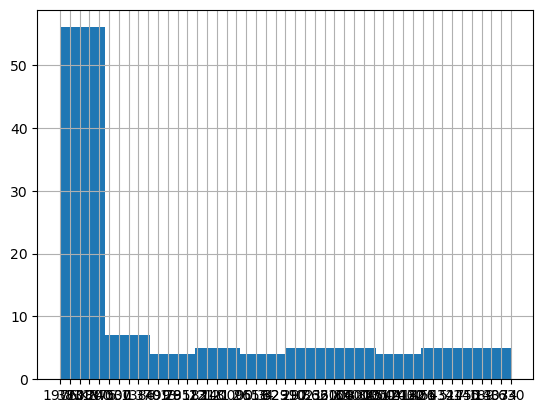

In [11]:
df['total_affected'].hist()

In [12]:
len(df)

100

<Axes: >

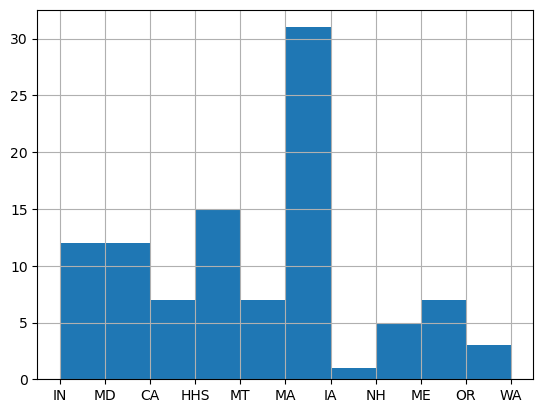

In [14]:
df['source'].hist()

<Axes: >

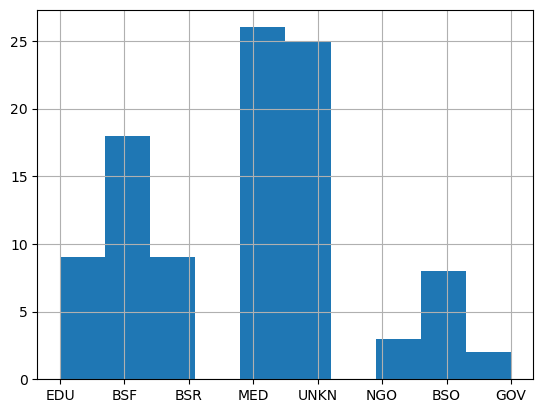

In [15]:
df['organization_type'].hist()